In [1]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.tree import DecisionTreeClassifier



In [2]:
# Read filtered csv file
inputdf = pd.read_csv("adult.input-filtered.csv")
testdf = pd.read_csv("adult.test-filtered.csv")

In [3]:
inputdf

,Unnamed: 0,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,...,8,9,10,11,12,13,14,15,16,income
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3696,3696,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3697,3697,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3698,3698,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
testdf

,Unnamed: 0,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,...,8,9,10,11,12,13,14,15,16,income
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,?
1,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,?
2,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,?
3,3,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,?
4,4,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,?
996,996,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,?
997,997,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,?
998,998,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,?


In [5]:
# Split the data set into features and outcome

X = inputdf.drop(['income'], axis=1)
Y = inputdf['income']

In [6]:
# Split the data set into features and outcome

x_test = testdf.drop(['income'], axis=1)
y_test = testdf['income']

In [7]:
X.head()

,Unnamed: 0,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,...,7,8,9,10,11,12,13,14,15,16
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Split the data into test and tvalidation data

from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split (X, Y, test_size = 0.3, random_state = 3)

In [9]:
# Use StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_validation = pd.DataFrame(scaler.transform(X_validation), columns = X.columns)

x_test = pd.DataFrame(scaler.transform(X_validation), columns = X.columns)

In [10]:
X_train.head()

,Unnamed: 0,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,...,7,8,9,10,11,12,13,14,15,16
0,0.588823,-0.671551,-0.363989,-0.423577,-0.415941,1.633571,2.572479,-1.599279,0.0,-0.419766,...,-0.172688,-0.096711,-0.681252,-0.510236,-0.228949,-0.190826,2.222694,-0.272476,-0.170302,-0.137415
1,0.756569,-0.671551,-0.363989,-0.423577,2.404185,-0.612156,2.572479,-1.599279,0.0,-0.419766,...,-0.172688,-0.096711,1.467886,-0.510236,-0.228949,-0.190826,-0.449905,-0.272476,-0.170302,-0.137415
2,-1.552519,-0.671551,2.747336,-0.423577,-0.415941,-0.612156,2.572479,-1.599279,0.0,-0.419766,...,-0.172688,-0.096711,1.467886,-0.510236,-0.228949,-0.190826,-0.449905,-0.272476,-0.170302,-0.137415
3,1.003971,-0.671551,-0.363989,-0.423577,-0.415941,1.633571,-0.388730,0.625282,0.0,-0.419766,...,-0.172688,-0.096711,1.467886,-0.510236,-0.228949,-0.190826,-0.449905,-0.272476,-0.170302,-0.137415
4,1.532512,-0.671551,-0.363989,2.360848,-0.415941,-0.612156,-0.388730,-1.599279,0.0,2.382280,...,-0.172688,-0.096711,-0.681252,-0.510236,-0.228949,-0.190826,-0.449905,3.670051,-0.170302,-0.137415


In [11]:
# Build the desicion tree model

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
y_pred = decision_tree.predict(X_validation)

In [12]:
# Evaluaction of the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(Y_validation, y_pred) * 100, 3))
print("F1 Score: ", round(f1_score(Y_validation,y_pred) * 100,3))
print("Presicion: ", round(precision_score(Y_validation,y_pred) * 100,3))


DecisionTreeClassifier:
Accuracy score: 74.054
F1 Score:  66.512
Presicion:  64.706


In [13]:
# Hyper - Tuning Parameters

from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier

params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [15, 20, 25],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [15, 20, 25]},
             scoring='accuracy', verbose=1)

In [25]:
score = pd.DataFrame(grid_search.cv_results_)
score.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.004767,0.000094,0.000969,0.000125,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.791506,0.791506,0.787645,0.785714,0.760618,0.783398,0.011609,10
14,0.004620,0.000194,0.000929,0.000115,entropy,10,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.783784,0.793436,0.797297,0.787645,0.762548,0.784942,0.012124,5
15,0.004946,0.000112,0.000937,0.000132,entropy,15,15,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.779923,0.795367,0.774131,0.777992,0.764479,0.778378,0.010024,16
16,0.004540,0.000066,0.000791,0.000031,entropy,15,20,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.791506,0.791506,0.772201,0.787645,0.760618,0.780695,0.012307,14
17,0.004399,0.000048,0.000778,0.000017,entropy,15,25,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.783784,0.793436,0.787645,0.787645,0.762548,0.783012,0.010686,11


In [15]:
# Choose the best model parameter

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 25}

In [16]:
# Choose the best accuracy 

grid_search.best_score_

0.7911196911196912

In [17]:
# Test the model with the best parameters

decision_tree_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=25)
decision_tree_tuned.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=25)

In [18]:
# Get the accuracy ad F1 score of the best model

y_pred_tuned = decision_tree_tuned.predict(X_validation)
acc_decision_tree = round(accuracy_score(Y_validation, y_pred_tuned) * 100, 3)

print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(Y_validation, y_pred_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(Y_validation,y_pred_tuned) * 100,3))
print("Presicion: ", round(precision_score(Y_validation,y_pred_tuned) * 100,3))


RandomForestClassifier:
Accuracy score: 79.55
F1 Score:  73.136
Presicion:  72.365


In [19]:
# Plot the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({'Model': ['Decision Tree'], 'Criterion': [grid_search.best_params_] ,'Score': [acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model,Criterion
Score,,
79.55,Decision Tree,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."


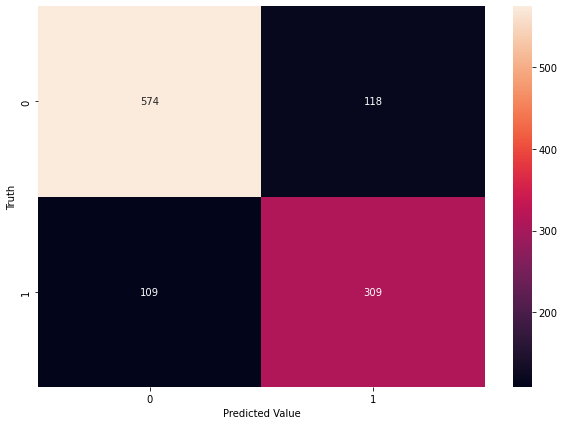

In [20]:
# Display confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_validation, y_pred_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

In [21]:
# Test the model with the best parameters

decision_tree_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=25)
decision_tree_tuned.fit(X_train,Y_train)

print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(Y_validation, y_pred_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(Y_validation,y_pred_tuned) * 100,3))
print("Presicion: ", round(precision_score(Y_validation,y_pred_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 79.55
F1 Score:  73.136
Presicion:  72.365


In [24]:
# Test the model with the best parameters

decision_tree_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=20)
decision_tree_tuned.fit(X_train,Y_train)

print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(Y_validation, y_pred_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(Y_validation,y_pred_tuned) * 100,3))
print("Presicion: ", round(precision_score(Y_validation,y_pred_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 79.55
F1 Score:  73.136
Presicion:  72.365


In [ ]:
# Test the model with the best parameters

decision_tree_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=20,min_samples_leaf=25)
decision_tree_tuned.fit(X_train,Y_train)

print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(Y_validation, y_pred_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(Y_validation,y_pred_tuned) * 100,3))
print("Presicion: ", round(precision_score(Y_validation,y_pred_tuned) * 100,3))
